In [2]:
#install.packages(c("DescTools", "mvtnorm", "expm"))

In [3]:
library(dplyr)
library("DescTools")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
blood_pressure <- read.csv("datasets/blood_pressure.csv", header=TRUE)

head(blood_pressure)

,patient,sex,agegrp,bp_before,bp_after
,<int>,<chr>,<chr>,<int>,<int>
1,1,Male,30-45,143,153
2,2,Male,30-45,163,170
3,3,Male,30-45,153,168
4,4,Male,30-45,153,142
5,5,Male,30-45,146,141
6,6,Male,30-45,150,147


In [5]:
dim(blood_pressure)

[1] 120   5

In [6]:
str(blood_pressure)

'data.frame':	120 obs. of  5 variables:
 $ patient  : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex      : chr  "Male" "Male" "Male" "Male" ...
 $ agegrp   : chr  "30-45" "30-45" "30-45" "30-45" ...
 $ bp_before: int  143 163 153 153 146 150 148 153 153 158 ...
 $ bp_after : int  153 170 168 142 141 147 133 141 131 125 ...


In [7]:
summary(blood_pressure)

    patient           sex               agegrp            bp_before    
 Min.   :  1.00   Length:120         Length:120         Min.   :138.0  
 1st Qu.: 30.75   Class :character   Class :character   1st Qu.:147.0  
 Median : 60.50   Mode  :character   Mode  :character   Median :154.5  
 Mean   : 60.50                                         Mean   :156.4  
 3rd Qu.: 90.25                                         3rd Qu.:164.0  
 Max.   :120.00                                         Max.   :185.0  
    bp_after    
 Min.   :125.0  
 1st Qu.:140.8  
 Median :149.5  
 Mean   :151.4  
 3rd Qu.:161.0  
 Max.   :185.0  

In [8]:
options(repr.plot.width=6, repr.plot.height=3.5)

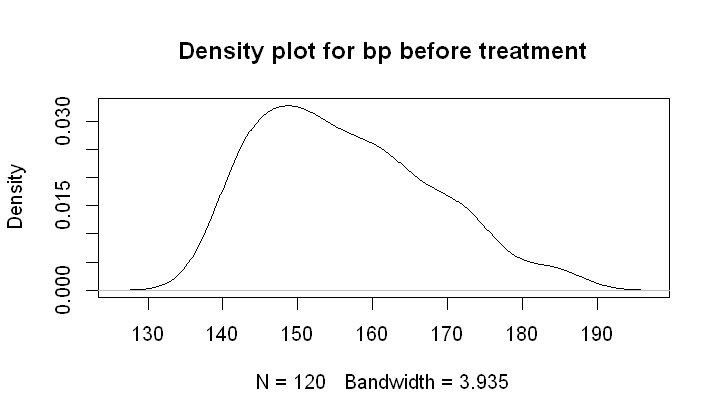

In [12]:
d1 <- density(blood_pressure$bp_before)

plot(d1, main = "Density plot for bp before treatment")

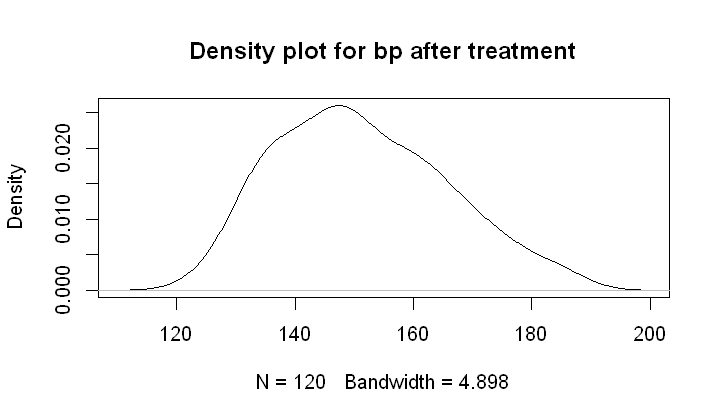

In [13]:
d2 <- density(blood_pressure$bp_after)

plot(d2, main="Density plot for bp after treatment")

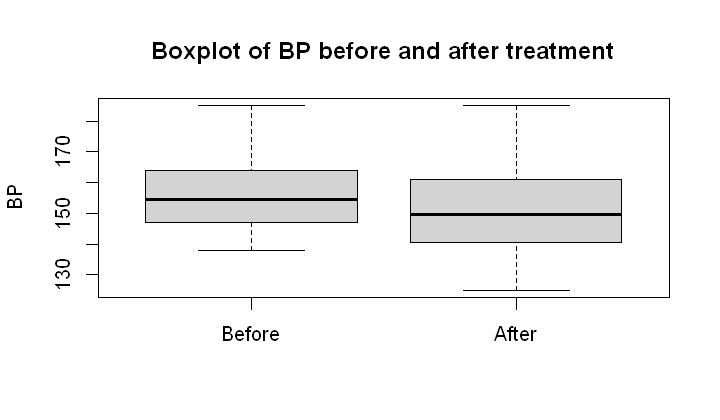

In [14]:
bp <- c("Before", "After")

boxplot(blood_pressure$bp_before,
blood_pressure$bp_after,
names = bp,
horizontal = FALSE,
main = "Boxplot of BP before and after treatment", ylab = "BP")

In [15]:
summary(blood_pressure$bp_before)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  138.0   147.0   154.5   156.4   164.0   185.0 

In [16]:
summary(blood_pressure$bp_after)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  125.0   140.8   149.5   151.4   161.0   185.0 

In [17]:
paired_test <- t.test(blood_pressure$bp_before, blood_pressure$bp_after, paired = TRUE, alternative = "two.sided")

paired_test


	Paired t-test

data:  blood_pressure$bp_before and blood_pressure$bp_after
t = 3.3372, df = 119, p-value = 0.00113
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 2.070557 8.112776
sample estimates:
mean of the differences 
               5.091667 


In [18]:
sd_bp = sd(blood_pressure$bp_after) - sd(blood_pressure$bp_before)

sd_bp

[1] 2.787777

In [21]:
paired_ztest <- with(select(blood_pressure, bp_before, bp_after), ZTest(bp_before, bp_after, sd_pop = sd_bp, paired = TRUE))

paired_ztest


	Paired z-test

data:  bp_before and bp_after
z = 20.007, Std. Dev. Population = 2.7878, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 4.592879 5.590454
sample estimates:
mean of the differences 
               5.091667 
